In [4]:
import matplotlib.pyplot as plt
import librosa
import h5py
import numpy as np

In [5]:
path = "..\..\Datasets\\VSD_2014_December_official_release\\Hollywood-dev\\features\\FightClub_auditory.mat"

In [6]:
with h5py.File(path, "r") as file:
    # Extraia a matriz "mfcc" do dataset
    mfcc_data = file["MFCC"][:]
    # Converta a matriz para um array numpy
    mfcc_array = np.array(mfcc_data)

In [7]:
np.max(mfcc_array)

341.23872189428204

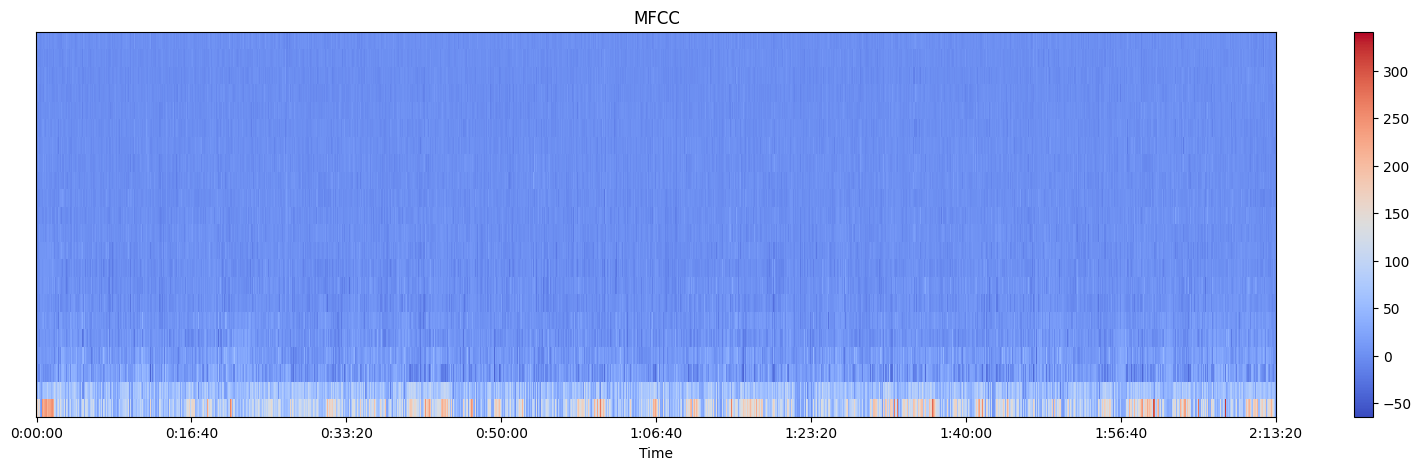

(200139, 22)


In [8]:
# Crie uma figura vazia
fig = plt.figure(figsize=(20, 5))

# Crie um eixo na figura
ax = fig.add_subplot(111)
n_amostras, n_coeficientes = mfcc_array.shape


def second_to_frame(second: int):
    return int(np.ceil(second * 25))


s_i = second_to_frame(6105)
s_f = second_to_frame(6108.7789182)
# Exiba a imagem de mfcc_array no eixo
img = librosa.display.specshow(
    data=mfcc_array.T, sr=44100, hop_length=1764, win_length=1764, x_axis="time", ax=ax
)

# Adicione uma barra de cor à figura
fig.colorbar(img, ax=ax)

# Defina o título do eixo
ax.set_title("MFCC")

# Exiba a figura
plt.show()

print(mfcc_array.shape)

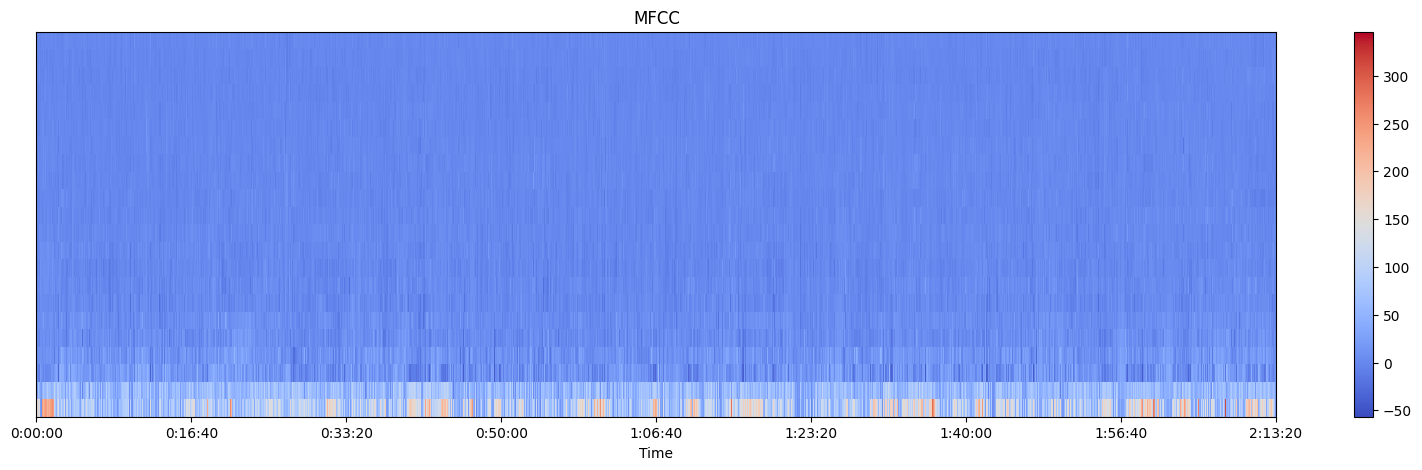

(22, 72613)


In [9]:
# Definir a taxa de amostragem original e a taxa de amostragem desejada
sr_orig = 44100
sr_resample = 16000

# Realizar o resample do áudio para 16kHz
mfcc_16k = librosa.resample(mfcc_array.T, orig_sr=sr_orig, target_sr=sr_resample)

# Calcular a MFCC para o áudio resampleado
# Substitua os parâmetros abaixo pelos valores apropriados para a sua aplicação
n_mfcc = 22
hop_length = 1764

# Crie uma figura vazia
fig = plt.figure(figsize=(20, 5))

# Crie um eixo na figura
ax = fig.add_subplot(111)

# Exiba a imagem de mfcc_array no eixo
img = librosa.display.specshow(
    data=mfcc_16k, sr=16000, hop_length=1764, win_length=1764, x_axis="time", ax=ax
)


# Adicione uma barra de cor à figura
fig.colorbar(img, ax=ax)

# Defina o título do eixo
ax.set_title("MFCC")

# Exiba a figura
plt.show()

print(mfcc_16k.shape)
# Usar a nova MFCC (mfccs) para sua aplicação

In [10]:
import h5py
import librosa
import numpy as np
import scipy.signal as signal

In [12]:
y, sr = librosa.load(
    "..\\..\\Datasets\\HEAR Dataset\\AUDIO\\media\\tiago\\ESTUDO\\DataSets\\HEAR\\__BASE_HEAR_V2\\Audio\\Train\\VIOLENCIA\\soundscape_unimodal0.wav",
    sr=16_000,
)

In [17]:
def moving_average(y, window_size, hop_lenght=640):
    y_len = len(y)

    n_windows = int(np.ceil(y_len / window_size))

    ma = np.zeros(n_windows)

    for i in range(n_windows):
        ma[i] = np.sum(
            np.convolve(
                y[i * window_size : window_size * (i + 1)],
                np.ones(window_size) / window_size,
            )
        )

    return ma

(250,)


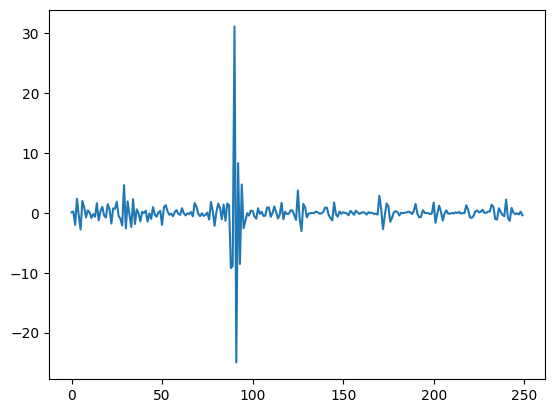

In [18]:
import matplotlib.pyplot as plt

y_ma = moving_average(y, window_size=640)

plt.plot(y_ma)
print(y_ma.shape)

In [19]:
def envelope_amplitude(y, window_size):
    analytic_signal = signal.hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)

    # Criando um array vazio para armazenar os valores subamostrados
    sub = [0]

    # Iterando sobre o sinal
    for i in range(0, len(amplitude_envelope), window_size):
        # Obtendo a janela atual
        y_window = y[i : i + window_size]

        # Calculando a média dos valores da janela e adicionando ao array de subamostragem
        sub.append(np.mean(y_window))

    return np.array(sub)

In [20]:
envelope = envelope_amplitude(y=y, window_size=640)

(251,)


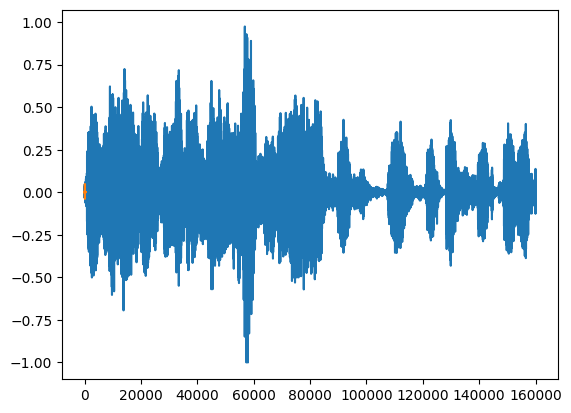

In [21]:
import matplotlib.pyplot as plt

print(envelope.shape)
plt.plot(y, label="signal")
plt.plot(envelope, label="envelope")
plt.show()

In [22]:
mfccs = librosa.feature.mfcc(
    y=y,
    sr=sr,
    n_mfcc=22,
    n_fft=1764,
    hop_length=1764,
    win_length=1764,
)


# Calcular a energia de cada coeficiente MFCC
energia_mfccs = np.sum(np.square(mfccs), axis=0)

# Normalizar os MFCCs por energia
mfccs_normalizados = mfccs / np.sqrt(energia_mfccs)

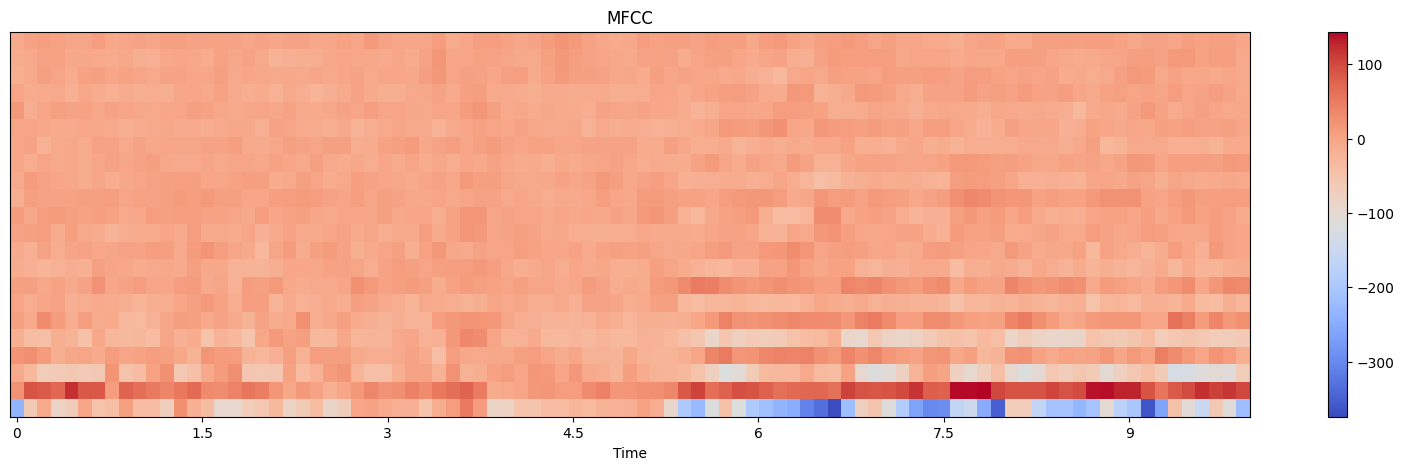

In [23]:
# Crie uma figura vazia
fig = plt.figure(figsize=(20, 5))

# Crie um eixo na figura
ax = fig.add_subplot(111)

img = librosa.display.specshow(
    data=mfccs, sr=16_000, hop_length=1764, win_length=1764, x_axis="time", ax=ax
)

# Adicione uma barra de cor à figura
fig.colorbar(img, ax=ax)

# Defina o título do eixo
ax.set_title("MFCC")

# Exiba a figura
plt.show()